# Linear Regression Model

In [222]:
import numpy as  np
import matplotlib.pyplot as plt
import copy, math
np.set_printoptions(precision=2)

###  Dataset: 

sample data is house price.

| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|----------------------- |  
| 952             | 2                   | 1                | 65           | 271.5                  |  
| 1244            | 3                   | 2                | 64           | 232                    |  
| 1947            | 3                   | 2                | 17           | 509.8                  |  
| ...             | ...                 | ...              | ...          | ...                    |


In [223]:
data = np.loadtxt("houses.txt", delimiter=',')
X_train = data[:,:4]
y_train = data[:,4]

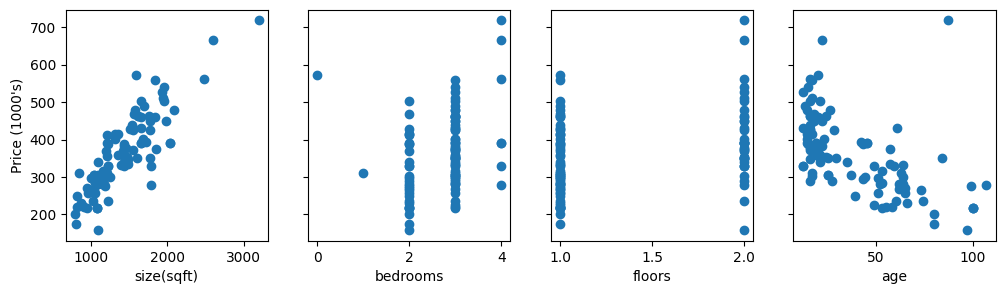

In [224]:
fig, ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
X_features = ['size(sqft)','bedrooms','floors','age']

for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

## Models Prediction
The model's prediction with multiple variables is given by the linear model:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$ 
where $\cdot$ is a vector `dot product`

In [225]:
def predict(X, w, b):
    p = np.dot(X, w) + b
    return p

In [226]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


## Compute Cost
The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ 

In [227]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = 0
    
    for i in range(m):
        f_x_i = np.dot(X[i], w) + b
        cost += (f_x_i - y[i]) ** 2

    return cost / (2 * m)

## Gradient Descent
Now we run gradient descent to find best $\vec{w},b$.
$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j = 0..n-1}\newline
&b\ \ := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value


In [228]:
def compute_gradient(X, y, w, b):
    m, n = X.shape                 # (number of examples, number of features)
 
    dj_dw = np.zeros((n,))
    dj_db = 0.
    
    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i,j]
        dj_db = dj_db + err

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

In [229]:
def gradient_descent(X, y, w_init, b_init, cost_function, gradient_function, alpha, num_iters):
    m = len(X)

    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_init)  #avoid modifying global w within function
    b = b_init

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        if i<100000:      # prevent resource exhaustion 
            J_history.append(cost_function(X, y, w, b))

        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}")
        
    return w, b, J_history

In [230]:
initial_b = 0.
initial_w = np.zeros_like(w_init)
alpha = 5.0e-10
iters = 1000

w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iters)

Iteration    0: Cost 70873.48
Iteration  100: Cost 57349.36
Iteration  200: Cost 46464.36
Iteration  300: Cost 37703.46
Iteration  400: Cost 30652.18
Iteration  500: Cost 24976.88
Iteration  600: Cost 20409.07
Iteration  700: Cost 16732.63
Iteration  800: Cost 13773.60
Iteration  900: Cost 11392.00


#### Learning Rat (alpha)
We test multiple alpha to find the best alpha.

In [231]:
#set alpha to 9.9e-7
_, _, hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha=9.9e-7, num_iters=10)

Iteration    0: Cost 93105.49
Iteration    1: Cost 122207.39
Iteration    2: Cost 160561.84
Iteration    3: Cost 211110.49
Iteration    4: Cost 277730.29
Iteration    5: Cost 365530.73
Iteration    6: Cost 481245.81
Iteration    7: Cost 633750.48
Iteration    8: Cost 834741.29
Iteration    9: Cost 1099633.51


>**Implementation Note:** cost increasing. so with that alpha we dont converge

In [255]:
#set alpha to 9.9e-10
_, _, hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha=9.9e-10, num_iters=10)

Iteration    0: Cost 70726.03
Iteration    1: Cost 70429.25
Iteration    2: Cost 70133.75
Iteration    3: Cost 69839.51
Iteration    4: Cost 69546.53
Iteration    5: Cost 69254.82
Iteration    6: Cost 68964.35
Iteration    7: Cost 68675.13
Iteration    8: Cost 68387.15
Iteration    9: Cost 68100.41


>**Implementation Note:** cost decreasing. so with that alpha we can converge

## z-score normalization 
After z-score normalization, all features will have a mean of 0 and a standard deviation of 1.

To implement z-score normalization, adjust your input values as shown in this formula:
$$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j} \tag{4}$$ 
where $j$ selects a feature or a column in the $\mathbf{X}$ matrix. $µ_j$ is the mean of all the values for feature (j) and $\sigma_j$ is the standard deviation of feature (j).
$$
\begin{align}
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j \tag{5}\\
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2  \tag{6}
\end{align}
$$

In [233]:
def zscore_normalize_features(X):
    mu     = np.mean(X, axis=0)
    sigma  = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    
    return (X_norm, mu, sigma)

In [234]:
X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)

print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

X_mu = [1.41e+03 2.71e+00 1.38e+00 3.86e+01], 
X_sigma = [412.17   0.65   0.49  25.79]
Peak to Peak range by column in Raw        X:[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to Peak range by column in Normalized X:[5.84 6.13 2.06 3.68]


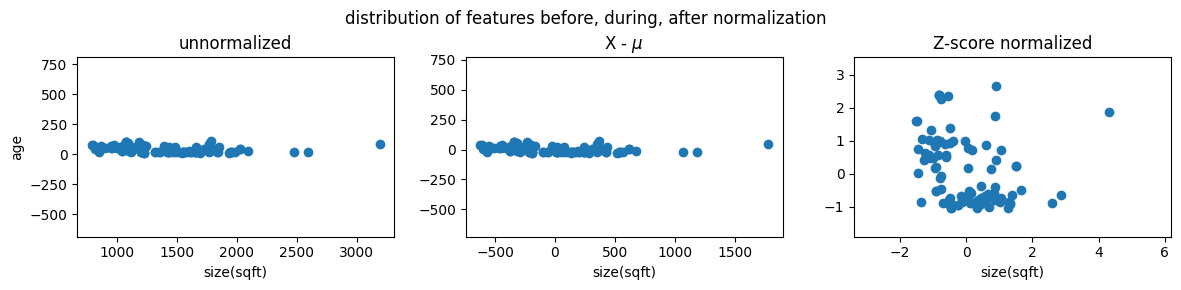

In [235]:
fig,ax=plt.subplots(1, 3, figsize=(12, 3))

ax[0].scatter(X_train[:,0],X_train[:,3])
ax[0].set_xlabel(X_features[0])
ax[0].set_ylabel(X_features[3])
ax[0].set_title("unnormalized")
ax[0].axis('equal')

X_mean = (X_train - X_mu)
ax[1].scatter(X_mean[:,0], X_mean[:,3])
ax[1].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

ax[2].scatter(X_norm[:,0], X_norm[:,3])
ax[2].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[2].set_title(r"Z-score normalized")
ax[2].axis('equal')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()

#### Running gradient descent with normalized data

In [240]:
initial_b = 0.
initial_w = np.zeros_like(w_init)
alpha = 1.0e-1
iters = 1000

w_norm, b_norm, J_hist = gradient_descent(X_norm, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iters)

print(f"found w,b by gradient descent: w={w_final} , b={b_final}")

Iteration    0: Cost 57326.42
Iteration  100: Cost   221.73
Iteration  200: Cost   219.71
Iteration  300: Cost   219.71
Iteration  400: Cost   219.71
Iteration  500: Cost   219.71
Iteration  600: Cost   219.71
Iteration  700: Cost   219.71
Iteration  800: Cost   219.71
Iteration  900: Cost   219.71
found w,b by gradient descent: w=[110.61 -21.47 -32.66 -37.78] , b=362.2395199999998


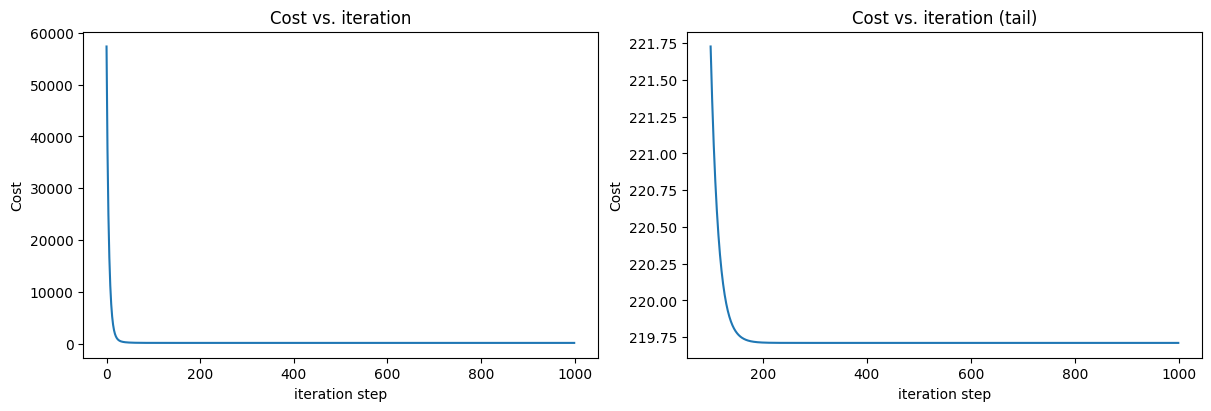

In [241]:
fig,ax = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax[0].plot(J_hist)
ax[0].set_xlabel("Iterations"); ax[0].set_ylabel("Cost")

ax[1].plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax[0].set_title("Cost vs. iteration");  ax[1].set_title("Cost vs. iteration (tail)")
ax[0].set_ylabel('Cost')             ;  ax[1].set_ylabel('Cost') 
ax[0].set_xlabel('iteration step')   ;  ax[1].set_xlabel('iteration step') 
plt.show()

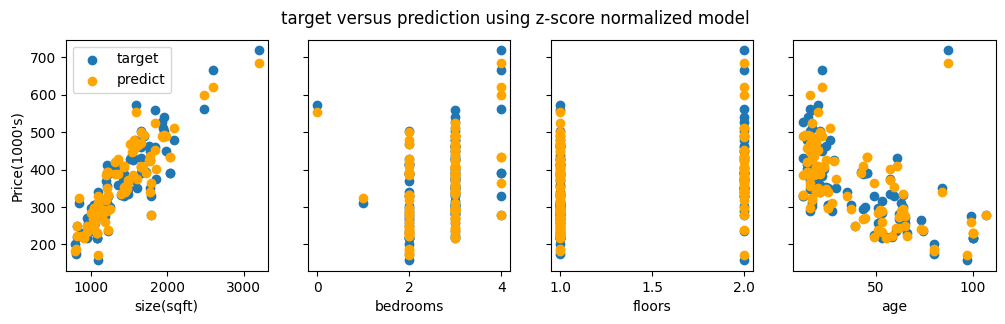

In [242]:
#predict target using normalized features
m = X_norm.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(X_norm[i], w_norm) + b_norm

# plot predictions and targets versus original features    
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],yp,color="orange", label = 'predict')
ax[0].set_ylabel("Price(1000's)"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

In [249]:
# First, normalize out example.
x_house = np.array([1200, 3, 1, 40])
x_house_norm = (x_house - X_mu) / X_sigma
print(x_house_norm)
x_house_predict = np.dot(x_house_norm, w_norm) + b_norm
print(f" predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = ${x_house_predict*1000:0.0f}")

[-0.52  0.44 -0.78  0.05]
 predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = $318936
